# RDF 1.2

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/<yourusername>/<yourrepo>/blob/main/book/notebooks/example.ipynb)

This document contains a short introduction to [RDF](https://www.w3.org/TR/rdf11-primer/) using [rudof](https://rudof-project.github.io/). 


## Install and configure rudof

The library is available as `pyrudof`.

In [1]:
!pip install pyrudof

The main entry point if a class called `Rudof` through which most of the functionality is provided.

In [2]:
from pyrudof import Rudof, RudofConfig

In order to initialize that class, it is possible to pass a RudofConfig instance which contains configuration parameters for customization.

In [3]:
rudof = Rudof(RudofConfig())

In [4]:
! pip install ipython # If not already installed
from IPython.display import Image # For displaying images

## Support for RDF 1.2

Reset previous state of `rudof` and remnove the temporary file `out.puml` if it exists.

In [5]:
rudof.reset_all()

In [6]:
!rm -f out.puml out.png

Rudof has added support for [RDF 1.2](https://www.w3.org/TR/rdf12-primer). It is possible, for example, to load some RDF 1.2 files and visualize them.


RDF 1.2 introduces [triple terms](https://www.w3.org/TR/rdf12-primer/#section-triple-terms) which denote statements that can be the object of some triples.

For example, we can state that `:bob` is interested in `:MonaLisa` since `4th October 1998` using the following code:

In [7]:
rudof.read_data_str("""
 prefix : <http://example.org/>
 prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
 prefix xsd: <http://www.w3.org/2001/XMLSchema#>

 :aliceBelief a :Statement ;
    rdf:reifies <<( :bob :knows :dave  )>> ;
    :since 2025 ;
    :accordingTo :dave  .
 """)


In [8]:
uml = rudof.data2plantuml_file('out.puml')

Visual graph: VisualRDFGraph with 11 nodes and 4 edges
Node 6: Iri: :bob (http://example.org/bob)
     count: UsageCount { as_predicate: 0, as_subject: 0, as_object: 0, as_predicate_in_triple: 0, as_subject_in_triple: 1, as_object_in_triple: 0 }
Node 0: Iri: :aliceBelief (http://example.org/aliceBelief)
     count: UsageCount { as_predicate: 0, as_subject: 4, as_object: 0, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 10: Iri: :Statement (http://example.org/Statement)
     count: UsageCount { as_predicate: 0, as_subject: 0, as_object: 1, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 7: Predicate: :knows (<http://example.org/knows>)
     count: UsageCount { as_predicate: 0, as_subject: 0, as_object: 0, as_predicate_in_triple: 1, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 4: Literal: 2025
     count: UsageCount { as_predicate: 0, as_subject: 0, as_object: 1, as_predicate_in_triple: 0, as_subject_in_triple

: 0, as_object_in_triple: 0 }
Node 5: Reifies
     count: UsageCount { as_predicate: 1, as_subject: 0, as_object: 0, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 2: Iri: :dave (http://example.org/dave)
     count: UsageCount { as_predicate: 0, as_subject: 0, as_object: 1, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 1 }
Node 9: Predicate: rdf:type (<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>)
     count: UsageCount { as_predicate: 1, as_subject: 0, as_object: 0, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 1: Predicate: :accordingTo (<http://example.org/accordingTo>)
     count: UsageCount { as_predicate: 1, as_subject: 0, as_object: 0, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 8: NonAssertedTriple
     count: UsageCount { as_predicate: 0, as_subject: 0, as_object: 1, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 

Convert the `puml` to an image.

In [9]:
!python -m plantuml out.puml

[{'filename': 'out.puml', 'gen_success': True}]


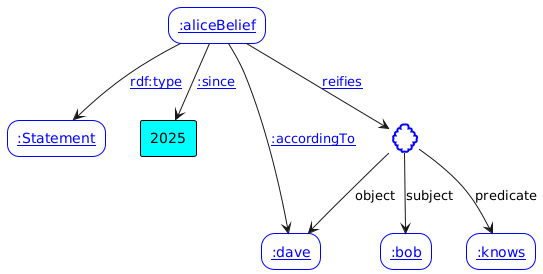

In [10]:
Image(f"out.png")

In [RDF 1.2 turtle syntax](https://www.w3.org/TR/rdf12-turtle/), there are several possibilities to define triple terms.



### Declaring triple terms directly

In [11]:
!rm -f out.puml out.pnf
rudof.reset_all()

A triple term can be declared enclosing it between `<<(` and `)>>`. For example:

In [12]:
rudof.read_data_str("""
PREFIX :    <http://www.example.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

_:e38  :familyName                     "Smith" .
_:anno rdf:reifies <<( _:e38 :jobTitle "Designer" )>> .
_:anno :accordingTo                     :eric .
 """)

In [13]:
uml = rudof.data2plantuml_file('out.puml')

Visual graph: VisualRDFGraph with 10 nodes and 3 edges
Node 2: Literal: "Smith"
     count: UsageCount { as_predicate: 0, as_subject: 0, as_object: 1, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 1: Predicate: :familyName (<http://www.example.org/familyName>)
     count: UsageCount { as_predicate: 1, as_subject: 0, as_object: 0, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 7: NonAssertedTriple
     count: UsageCount { as_predicate: 0, as_subject: 0, as_object: 1, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 8: Predicate: :accordingTo (<http://www.example.org/accordingTo>)
     count: UsageCount { as_predicate: 1, as_subject: 0, as_object: 0, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 5: Predicate: :jobTitle (<http://www.example.org/jobTitle>)
     count: UsageCount { as_predicate: 0, as_subject: 0, as_object: 0, as_predicate_in_triple: 1,

In [14]:
!python -m plantuml out.puml

[{'filename': 'out.puml', 'gen_success': True}]


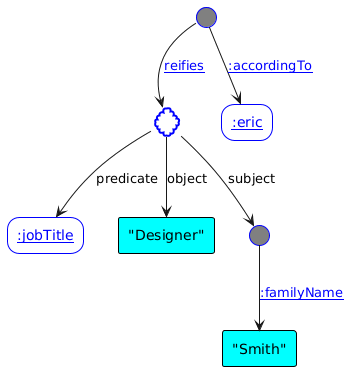

In [15]:
Image(f"out.png")

### Reifying triples

In [16]:
!rm -f out.puml out.pnf
rudof.reset_all()

Enclosing a triple between `<<` and `>>`, is a syntactic sugar that declares that there is a reifier whose object is that triple and that can be used to add more declarations about that reifier.

For example:

In [17]:
rudof.read_data_str("""
 PREFIX :    <http://www.example.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

:employee38 :familyName "Smith" .
<< :employee38 :jobTitle "Assistant Designer" >> :accordingTo :employee22 .
 """)

Visual graph: VisualRDFGraph with 10 nodes and 3 edges
Node 4: Predicate: :accordingTo (<http://www.example.org/accordingTo>)
     count: UsageCount { as_predicate: 1, as_subject: 0, as_object: 0, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 3: BlankNode: d01ec065a4c8669dbee3d5dbc6a9fa9e
     count: UsageCount { as_predicate: 0, as_subject: 2, as_object: 0, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 8: Literal: "Assistant Designer"
     count: UsageCount { as_predicate: 0, as_subject: 0, as_object: 0, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 1 }
Node 0: Iri: :employee38 (http://www.example.org/employee38)
     count: UsageCount { as_predicate: 0, as_subject: 1, as_object: 0, as_predicate_in_triple: 0, as_subject_in_triple: 1, as_object_in_triple: 0 }
Node 9: NonAssertedTriple
     count: UsageCount { as_predicate: 0, as_subject: 0, as_object: 1, as_predicate_in_triple: 0, as_subj

[{'filename': 'out.puml', 'gen_success': True}]


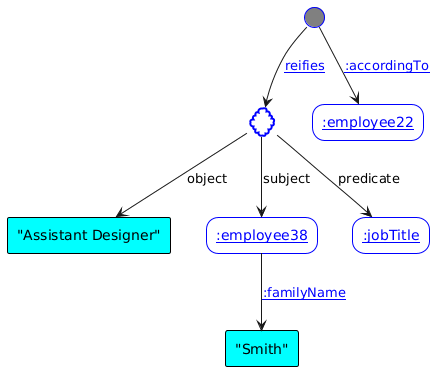

In [18]:
uml = rudof.data2plantuml_file('out.puml')
!python -m plantuml out.puml
Image(f"out.png")

### Annotation syntax

In [19]:
# Clean the workspace
!rm -f out.puml out.pnf
rudof.reset_all()

It is also possible to use the annotation syntax where a statement can be annotated with `{|` and `|}` as follows:


In [20]:
rudof.read_data_str("""
 PREFIX : <http://example.com/>
 PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
 :alice :name "Alice" ~ :t {|
   :statedBy :bob ;
   :recorded "2021-07-07"^^xsd:date
 |} .
 """)

Visual graph: VisualRDFGraph with 10 nodes and 4 edges
Node 5: Iri: :bob (http://example.com/bob)
     count: UsageCount { as_predicate: 0, as_subject: 0, as_object: 1, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 6: Predicate: :recorded (<http://example.com/recorded>)
     count: UsageCount { as_predicate: 1, as_subject: 0, as_object: 0, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 3: Iri: :t (http://example.com/t)
     count: UsageCount { as_predicate: 0, as_subject: 3, as_object: 0, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 4: Predicate: :statedBy (<http://example.com/statedBy>)
     count: UsageCount { as_predicate: 1, as_subject: 0, as_object: 0, as_predicate_in_triple: 0, as_subject_in_triple: 0, as_object_in_triple: 0 }
Node 0: Iri: :alice (http://example.com/alice)
     count: UsageCount { as_predicate: 0, as_subject: 1, as_object: 0, as_predicate_in_triple: 0, as_s

[{'filename': 'out.puml', 'gen_success': True}]


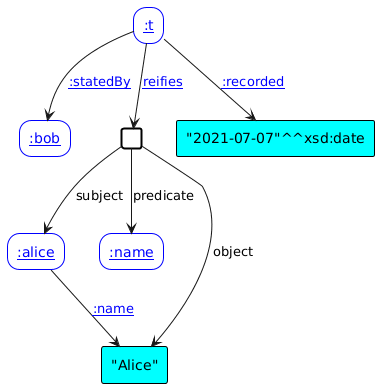

In [21]:
uml = rudof.data2plantuml_file('out.puml')
!python -m plantuml out.puml
Image(f"out.png")

Notice that in the visualization, we differentiate between a statement that is part of the graph which is represented by a box from a statement that is not part of the graph, which is represented by a cloud symbol.